In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

%matplotlib inline

In [54]:
cars_flag = True
if cars_flag:
    src = '../cars/car.data'
    import warnings
    warnings.filterwarnings(action='ignore', category=DeprecationWarning)
else:
    src = '../adult/data.txt'
data = pd.read_csv(src, index_col=0)

In [3]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [5]:
# Set data set specific settings for template

mappings = {}
cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex','native-country', 'class']
if cars_flag:
    scoring = metrics.make_scorer(metrics.matthews_corrcoef)    
    for i in data.columns:
        data[i]=le.fit_transform(data[i])
        mappings[i] = list(le.classes_)
else:
    scoring = 'accuracy'    
    for i in cols:
        data[i]=le.fit_transform(data[i])
        mappings[i] = list(le.classes_)

In [6]:
mappings

{'buying': ['high', 'low', 'med', 'vhigh'],
 'class': ['acc', 'good', 'unacc', 'vgood'],
 'doors': ['2', '3', '4', '5more'],
 'lug_boot': ['big', 'med', 'small'],
 'maint': ['high', 'low', 'med', 'vhigh'],
 'persons': ['2', '4', 'more'],
 'safety': ['high', 'low', 'med']}

In [7]:
X = data.loc[:,data.columns != 'class']
y = data.iloc[:,-1]

In [8]:
print(X.shape)
print(y.shape)
X.head()

(1728, 6)
(1728,)


,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2


In [9]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: class, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Null Accuracy
#### Accuracy that could be achieved by always predicting the most frequent class

In [11]:
y_test.value_counts()

2    235
0     79
1     17
3     15
Name: class, dtype: int64

In [12]:
# null accuracy for multi-class, accuracy by always predicting most frequent
# value_counts returns descending order
y_test.value_counts().head(1) / len(y_test)

2    0.679191
Name: class, dtype: float64

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [76]:
param_grid = dict(max_depth=range(1,11), min_samples_split=[2,5], min_samples_leaf=[2,5])
grid = GridSearchCV(clf, param_grid=param_grid, scoring=scoring, cv=10, n_jobs=-1)

In [77]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_split': [2, 5], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [2, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(matthews_corrcoef), verbose=0)

In [78]:
clf = grid.best_estimator_
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.9204869816327503
{'min_samples_split': 5, 'max_depth': 10, 'min_samples_leaf': 2}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [79]:
train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=10, scoring=scoring)
print(scoring)

make_scorer(matthews_corrcoef)


In [80]:
train_scores_mean = np.mean(train_scores,axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

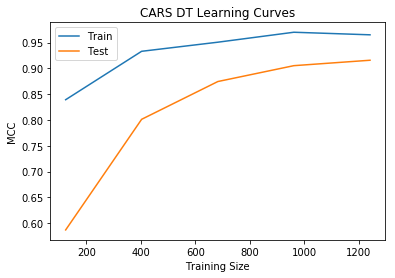

In [81]:
plt.title("CARS DT Learning Curves")
plt.xlabel("Training Size")
plt.ylabel("MCC")
plt.plot(train_sizes, train_scores_mean, label="Train")
plt.plot(train_sizes, test_scores_mean, label="Test")
plt.legend(loc='best')

In [41]:
param_range = range(1,16)
train_scores, test_scores = validation_curve(clf, X_train, y_train, 
                                             param_name='max_depth', 
                                             param_range=param_range,
                                             cv=10,
                                             scoring=scoring)

In [42]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

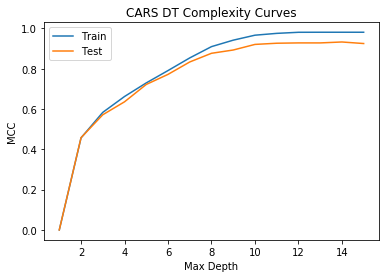

In [43]:
plt.title("CARS DT Complexity Curves")
plt.xlabel("Max Depth")
plt.ylabel("MCC")
plt.plot(param_range, train_scores_mean, label="Train")
plt.plot(param_range, test_scores_mean, label="Test")
plt.legend(loc='best')

In [128]:
param_grid = dict(max_depth=[5], min_samples_split=[10,30,50,100,150], min_samples_leaf=[10,30,50,100,150], class_weight=['balanced',None])
grid = GridSearchCV(clf, param_grid=param_grid, scoring=scoring, cv=10, n_jobs=-1)

In [129]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_split': [10, 30, 50, 100, 150], 'class_weight': ['balanced', None], 'max_depth': [5], 'min_samples_leaf': [10, 30, 50, 100, 150]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(matthews_corrcoef), verbose=0)

In [130]:
clf = grid.best_estimator_
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.7218687513301352
{'min_samples_split': 10, 'min_samples_leaf': 10, 'max_depth': 5, 'class_weight': None}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [131]:
train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=10, scoring=scoring)
print(scoring)

make_scorer(matthews_corrcoef)


In [132]:
train_scores_mean = np.mean(train_scores,axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

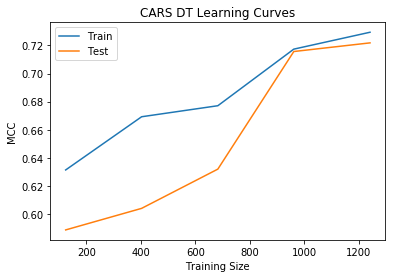

In [133]:
plt.title("CARS DT Learning Curves")
plt.xlabel("Training Size")
plt.ylabel("MCC")
plt.plot(train_sizes, train_scores_mean, label="Train")
plt.plot(train_sizes, test_scores_mean, label="Test")
plt.legend(loc='best')

In [61]:
from sklearn.tree import export_graphviz

In [62]:
export_graphviz(clf, out_file='cars.dot')

In [111]:
clf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [112]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [114]:
export_graphviz(clf, out_file='cars10.dot')

In [115]:
y_pred = clf.predict(X_test)

In [116]:
print metrics.matthews_corrcoef(y_test, y_pred)

0.8930128838315262


In [134]:
clf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [135]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [136]:
export_graphviz(clf, out_file='cars5.dot')

In [137]:
y_pred = clf.predict(X_test)

In [138]:
print metrics.matthews_corrcoef(y_test, y_pred)

0.6969339123782815


In [106]:
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_test, y_test, test_size=0.55)

In [107]:
clf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [108]:
clf.fit(X_train_sub, y_train_sub)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [109]:
y_pred = clf.predict(X_test)

In [110]:
print metrics.matthews_corrcoef(y_test, y_pred)

0.6735700126164303


In [139]:
clf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [140]:
clf.fit(X_train_sub, y_train_sub)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [141]:
y_pred = clf.predict(X_test)

In [142]:
print metrics.matthews_corrcoef(y_test, y_pred)

0.752959701537179
